In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [34]:
# N: Numero Total
# I: Infectados
# E: Expostos
# S: Sucetíveis
# R: Recuperados
# D: Mortos
# beta: taxa de transmissão
# sigma: taxa de incubação (1/sigma)
# gamma: chance de recuperação (1/duração)
# mi: taxa de mortalidade

# N = 1000
# I0, R0 = 1, 0
# S0 = N - I0 - R0
# beta, gamma = 0.2, 1./10.

# Vetor de trabalho, parâmetros do linspace (tempo inicial, tempo final, qtd de pontos)
# t = np.linspace(0,160,160)

# initN = 1380000000
## S0 = 966000000
# initE = 1
# initI = 1
# initR = 0
# initD = 0
# sigma = 1/5.2
# gamma = 1/2.9
# mu = 0.034
# R0 = 4
# beta = R0 * gamma
# days = 180

# Inicio de fato
N = 1380000000

# Valores iniciais
I0 = 1
E0 = 1
R0 = 0
D0 = 0
S0 = N - (I0 + R0 + D0 + E0)

# R0 = 4
beta = 4 * gamma # Verificar isso dps pq o r0 no modelo dele tem outro significado
sigma = 1/5.2
gamma = 1/2.9
mu = 0.034

days = 160

t = np.linspace(0,days,days)


In [35]:
def deriv(y, t, N, beta, sigma, gamma, mu):
  # S, I, R = y

  # Novas variaveis
  S, E, I, R, D = y

  # Mantem Igual
  dSdt = -beta* S*I/N
  dRdt = gamma * I

  # Alterada
  # dIdt = beta*S*I/N-gamma*I
  dIdt = sigma*E - gamma*I - mu*I

  # Novas
  dEdt = beta*S*I/N - sigma*E
  dDdt = mu*I
  
  # return dSdt, dIdt, dRdt
  return [dSdt, dEdt, dIdt, dRdt, dDdt]



In [36]:
# Alteradas
# y0 =  S0, I0, R0
y0 = S0, E0, I0, R0, D0

# ret = odeint(deriv, y0, t, args=(N, beta, gamma))
ret = odeint(deriv, y0, t, args=(N, beta, sigma, gamma, mu))

# S, I, R = ret.T
S, E, I, R, D = ret.T

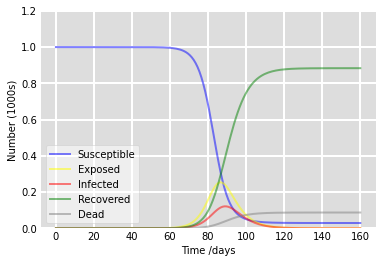

In [37]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)

# Alterados
# ax.plot(t, S/1000, 'b', alpha = 0.5, lw = 2, label = 'Susceptible')
# ax.plot(t, I/1000, 'r', alpha = 0.5, lw = 2, label = 'Infected')
# ax.plot(t, R/1000, 'g', alpha = 0.5, lw = 2, label = 'Recovered')

ax.plot(t, S/N, 'blue', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(t, E/N, 'yellow', alpha = 0.5, lw = 2, label = 'Exposed')
ax.plot(t, I/N, 'red', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(t, R/N, 'green', alpha = 0.5, lw = 2, label = 'Recovered')
ax.plot(t, D/N, 'gray', alpha = 0.5, lw = 2, label = 'Dead')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

